In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Import CSV file of ETFs

etf_df = pd.read_csv('ETF prices.csv', parse_dates=True, infer_datetime_format=True)

FileNotFoundError: [Errno 2] No such file or directory: 'ETF prices.csv'

In [4]:
# Drop unneeded columns from DataFrame

etf_df.drop(columns=['open', 'high', 'low', 'close', 'volume'], inplace=True)

In [5]:
# Create dataframe table with data starting from 2016

etf_2016 = etf_df.loc[etf_df['price_date'] >= "2016"]

In [7]:
# Create pivot table that displays the prices of each ETF by date

etf_pivot = etf_2016.pivot_table(index = ["price_date"], columns = "fund_symbol", values = "adj_close")

In [10]:
# Remove ETFs that don't have a full data sample over entire 5-year period

etf_pivot_df = etf_pivot.dropna(axis='columns')

In [12]:
#Find the daily returns of each ETF

etf_returns = etf_pivot_df.pct_change().dropna()

In [72]:
# Import CSV file of 10-year Treasury rates data

tnx_df = pd.read_csv("^TNX.csv", parse_dates=True, infer_datetime_format=True)

In [76]:
# Set df index

tnx_index = tnx_df.set_index("Date")

In [81]:
# Drop irrelevant columns

tnx_index.drop(columns=['Open', "High", "Low", "Close", "Volume"], inplace=True)

In [82]:
# Drop Null Values

tnx_df.dropna(inplace=True)

In [83]:
# Concatenate TNX df with ETF df

tnx_etf = pd.concat([tnx_index, etf_pivot_df], join = "inner", axis = 1)

In [86]:
# Rename TNX column

tnx_etf.rename(columns={"Adj Close" : "TNX"}, inplace=True)

In [90]:
# Find daily returns of Dataframe and drop null values

tnx_etf_returns = tnx_etf.pct_change().dropna()

In [98]:
# Find sharpe ratio of each ETF

sharpe_ratio = ((tnx_etf_returns.mean()-tnx_etf_returns['TNX'].mean()) * 252)/(tnx_etf_returns.std() * np.sqrt(252))

In [105]:
sharpe_ratio.describe()

count    1072.000000
mean       -0.234428
std         1.708128
min       -33.753087
25%        -0.295856
50%         0.072202
75%         0.295121
max         1.066480
dtype: float64

<AxesSubplot:>

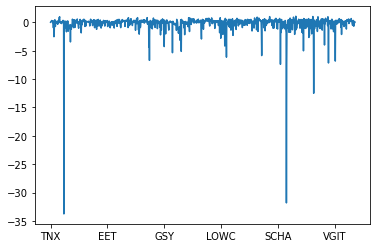

In [104]:
sharpe_ratio.plot()